<a href="https://colab.research.google.com/github/couqdev/MachineLearning/blob/main/Lab_7_20130376_TranDangQuoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MachineLeaning'

Mounted at /content/gdrive
/content/gdrive/MyDrive/MachineLeaning


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [32]:
from sklearn.metrics import accuracy_score
data = datasets.load_iris()
data
X = data.data
y = data.target

clf = svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print("Accuracy: ",np.mean(scores['test_score']))
# scores = cross_validate(clf, X, y, scoring='recall_macro', cv=10)
# print(sorted(scores.keys()))
# print("Recall: ",np.mean(scores['test_score']))
# scores = cross_validate(clf, X, y, scoring='precision_macro', cv=10)
# print(sorted(scores.keys()))
# print("Precision: ",np.mean(scores['test_score']))
# scores = cross_validate(clf, X, y, scoring='f1_macro', cv=10)
# print(sorted(scores.keys()))
# print("F1: ",np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
Accuracy:  0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [8]:
chi2_selector = SelectKBest(chi2, k=2)
X = chi2_selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred,)
pre = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
f1 = metrics.f1_score(y_test, y_pred, average='micro')
print(acc)
print(pre)
print(recall)
print(f1)

0.9555555555555556
0.9555555555555556
0.9555555555555556
0.9555555555555556


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

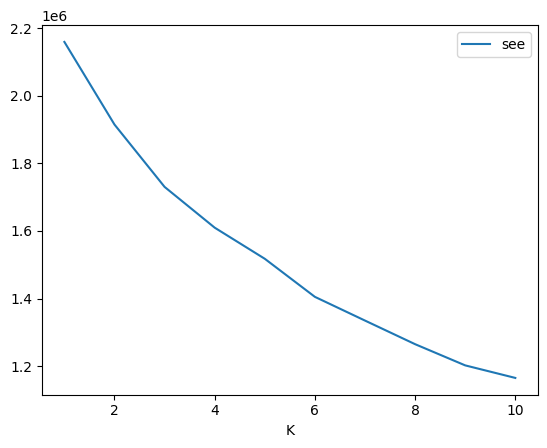

In [14]:

data_mnist = datasets.load_digits()

kmeans = KMeans(n_clusters = 10, n_init = 12, random_state = 0)
kmeans.fit(data_mnist.data)
clusters = kmeans.predict(data_mnist.data)
kmeans.cluster_centers_.shape
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, n_init = 12, random_state = 0)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

k_range = range(1, 11)
plt.xlabel('K')
plt.plot(k_range, sse, label='see')
plt.legend()
plt.show()

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
acc_kmeans = metrics.accuracy_score(y_test, y_pred,)
precision_kmeans = metrics.precision_score(y_test, y_pred, average='micro')
recall_kmeans = metrics.recall_score(y_test, y_pred, average='micro')
f1_kmeans = metrics.f1_score(y_test, y_pred, average='micro')

In [17]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc_random_forest = metrics.accuracy_score(y_test, y_pred,)
precision_random_forest = metrics.precision_score(y_test, y_pred, average='micro')
recall_random_forest = metrics.recall_score(y_test, y_pred, average='micro')
f1_random_forest = metrics.f1_score(y_test, y_pred, average='micro')

In [18]:
cls = GaussianNB()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
acc_naive_bayes = metrics.accuracy_score(y_test, y_pred)
precision_naive_bayes = metrics.precision_score(y_test, y_pred, average='micro')
recall_naive_bayes = metrics.recall_score(y_test, y_pred, average='micro')
f1_naive_bayes = metrics.f1_score(y_test, y_pred, average='micro')

In [19]:
k_range = range(1, 30, 2)
accs = []
precision = []
recall = []
f1 = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN.fit(X_train, y_train)
  y_pred = KNN.predict(X_test)
  accs.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred, average = 'micro'))
  recall.append(metrics.recall_score(y_test, y_pred, average = 'micro'))
  f1.append(metrics.f1_score(y_test, y_pred, average = 'micro'))
acc_knn = round(max(accs),4)
precision_knn = round(max(precision),4)
f1_knn = round(max(f1),4)
recall_knn = round(max(recall),4)


In [20]:
t = PrettyTable(['','acc','precision','recall','f1'])
t.add_row(['K-Means',acc_kmeans,precision_kmeans,recall_kmeans,f1_kmeans])
t.add_row(['kNN',acc_knn,precision_knn,recall_knn,f1_knn])
t.add_row(['Native Bayes',acc_naive_bayes,precision_naive_bayes,recall_naive_bayes,f1_naive_bayes])
print(t)

+--------------+----------------------+----------------------+----------------------+----------------------+
|              |         acc          |      precision       |        recall        |          f1          |
+--------------+----------------------+----------------------+----------------------+----------------------+
|   K-Means    | 0.037037037037037035 | 0.037037037037037035 | 0.037037037037037035 | 0.037037037037037035 |
|     kNN      |        0.9907        |        0.9907        |        0.9907        |        0.9907        |
| Native Bayes |  0.8314814814814815  |  0.8314814814814815  |  0.8314814814814815  |  0.8314814814814816  |
+--------------+----------------------+----------------------+----------------------+----------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [21]:
print("KNN")
print("Co giam sat")

KNN
Co giam sat


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





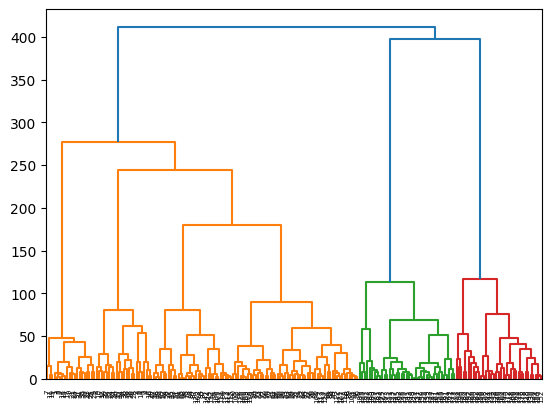

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
df = pd.read_csv('shopping-data.csv')
df = df.drop(['CustomerID', 'Genre'], axis=1)
linked = linkage(df, 'ward')
dendrogram(linked)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

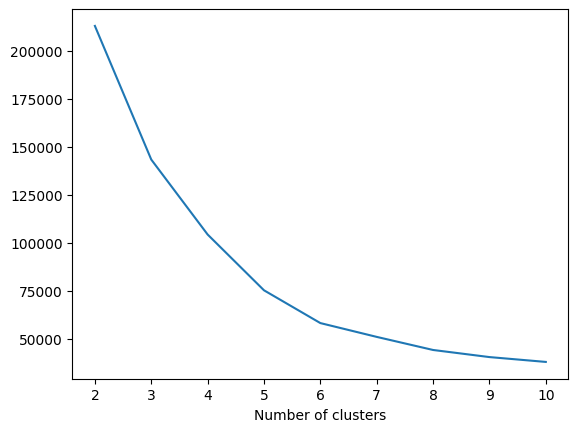

In [26]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=12)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 11), sse)
plt.xlabel('Number of clusters')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

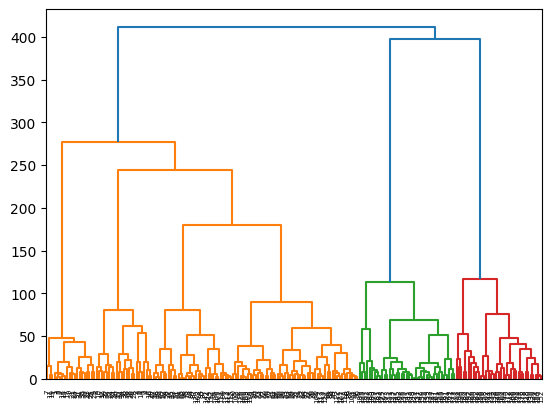

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [31]:
linked = linkage(df, 'ward')
dendrogram(linked)
plt.show()
n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(df)
labels = agg_clustering.labels_
print(labels)
     

#Finally,
Save a copy in your Github. Remember renaming the notebook.